In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings(action='ignore')

train = pd.read_csv('train.csv')
train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

<Axes: >

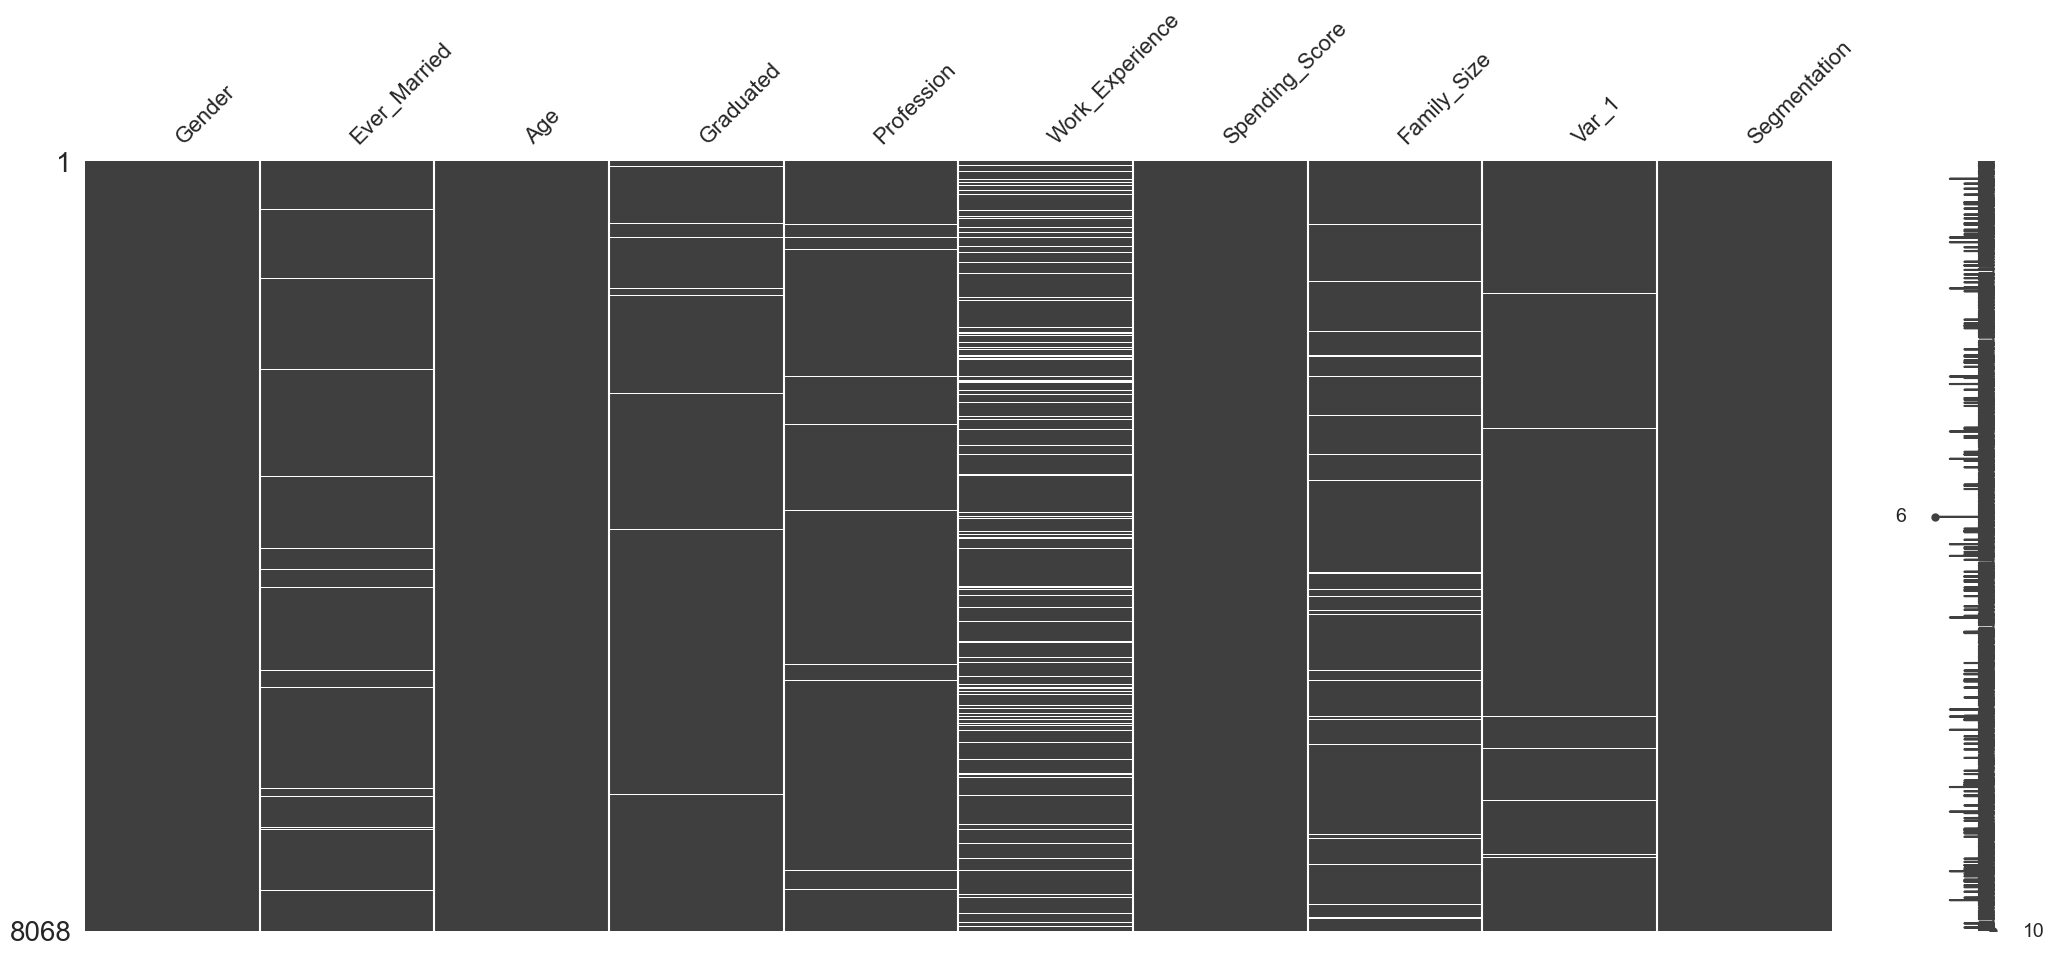

In [80]:
train = train.drop(columns = 'ID')
msno.matrix(df = train.iloc[:,:])

<Axes: >

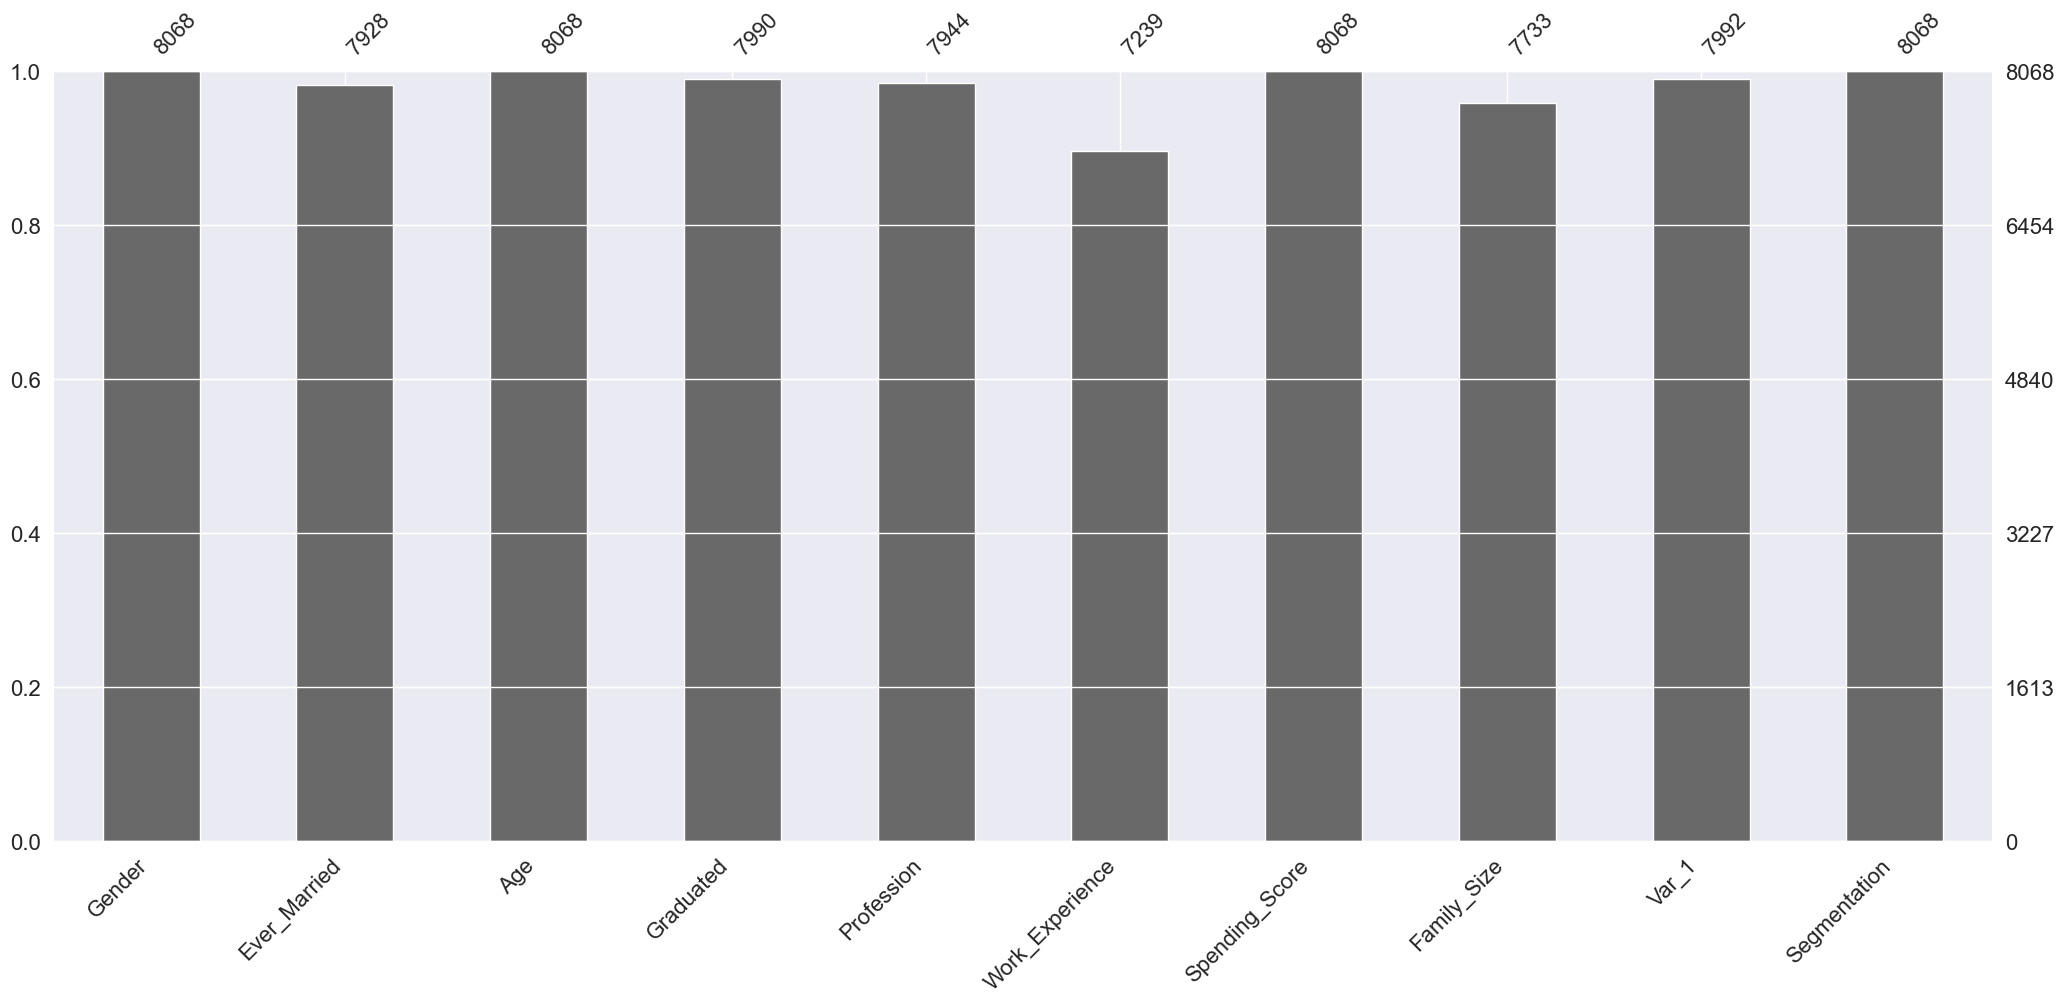

In [81]:
msno.bar(df = train.iloc[:,:])

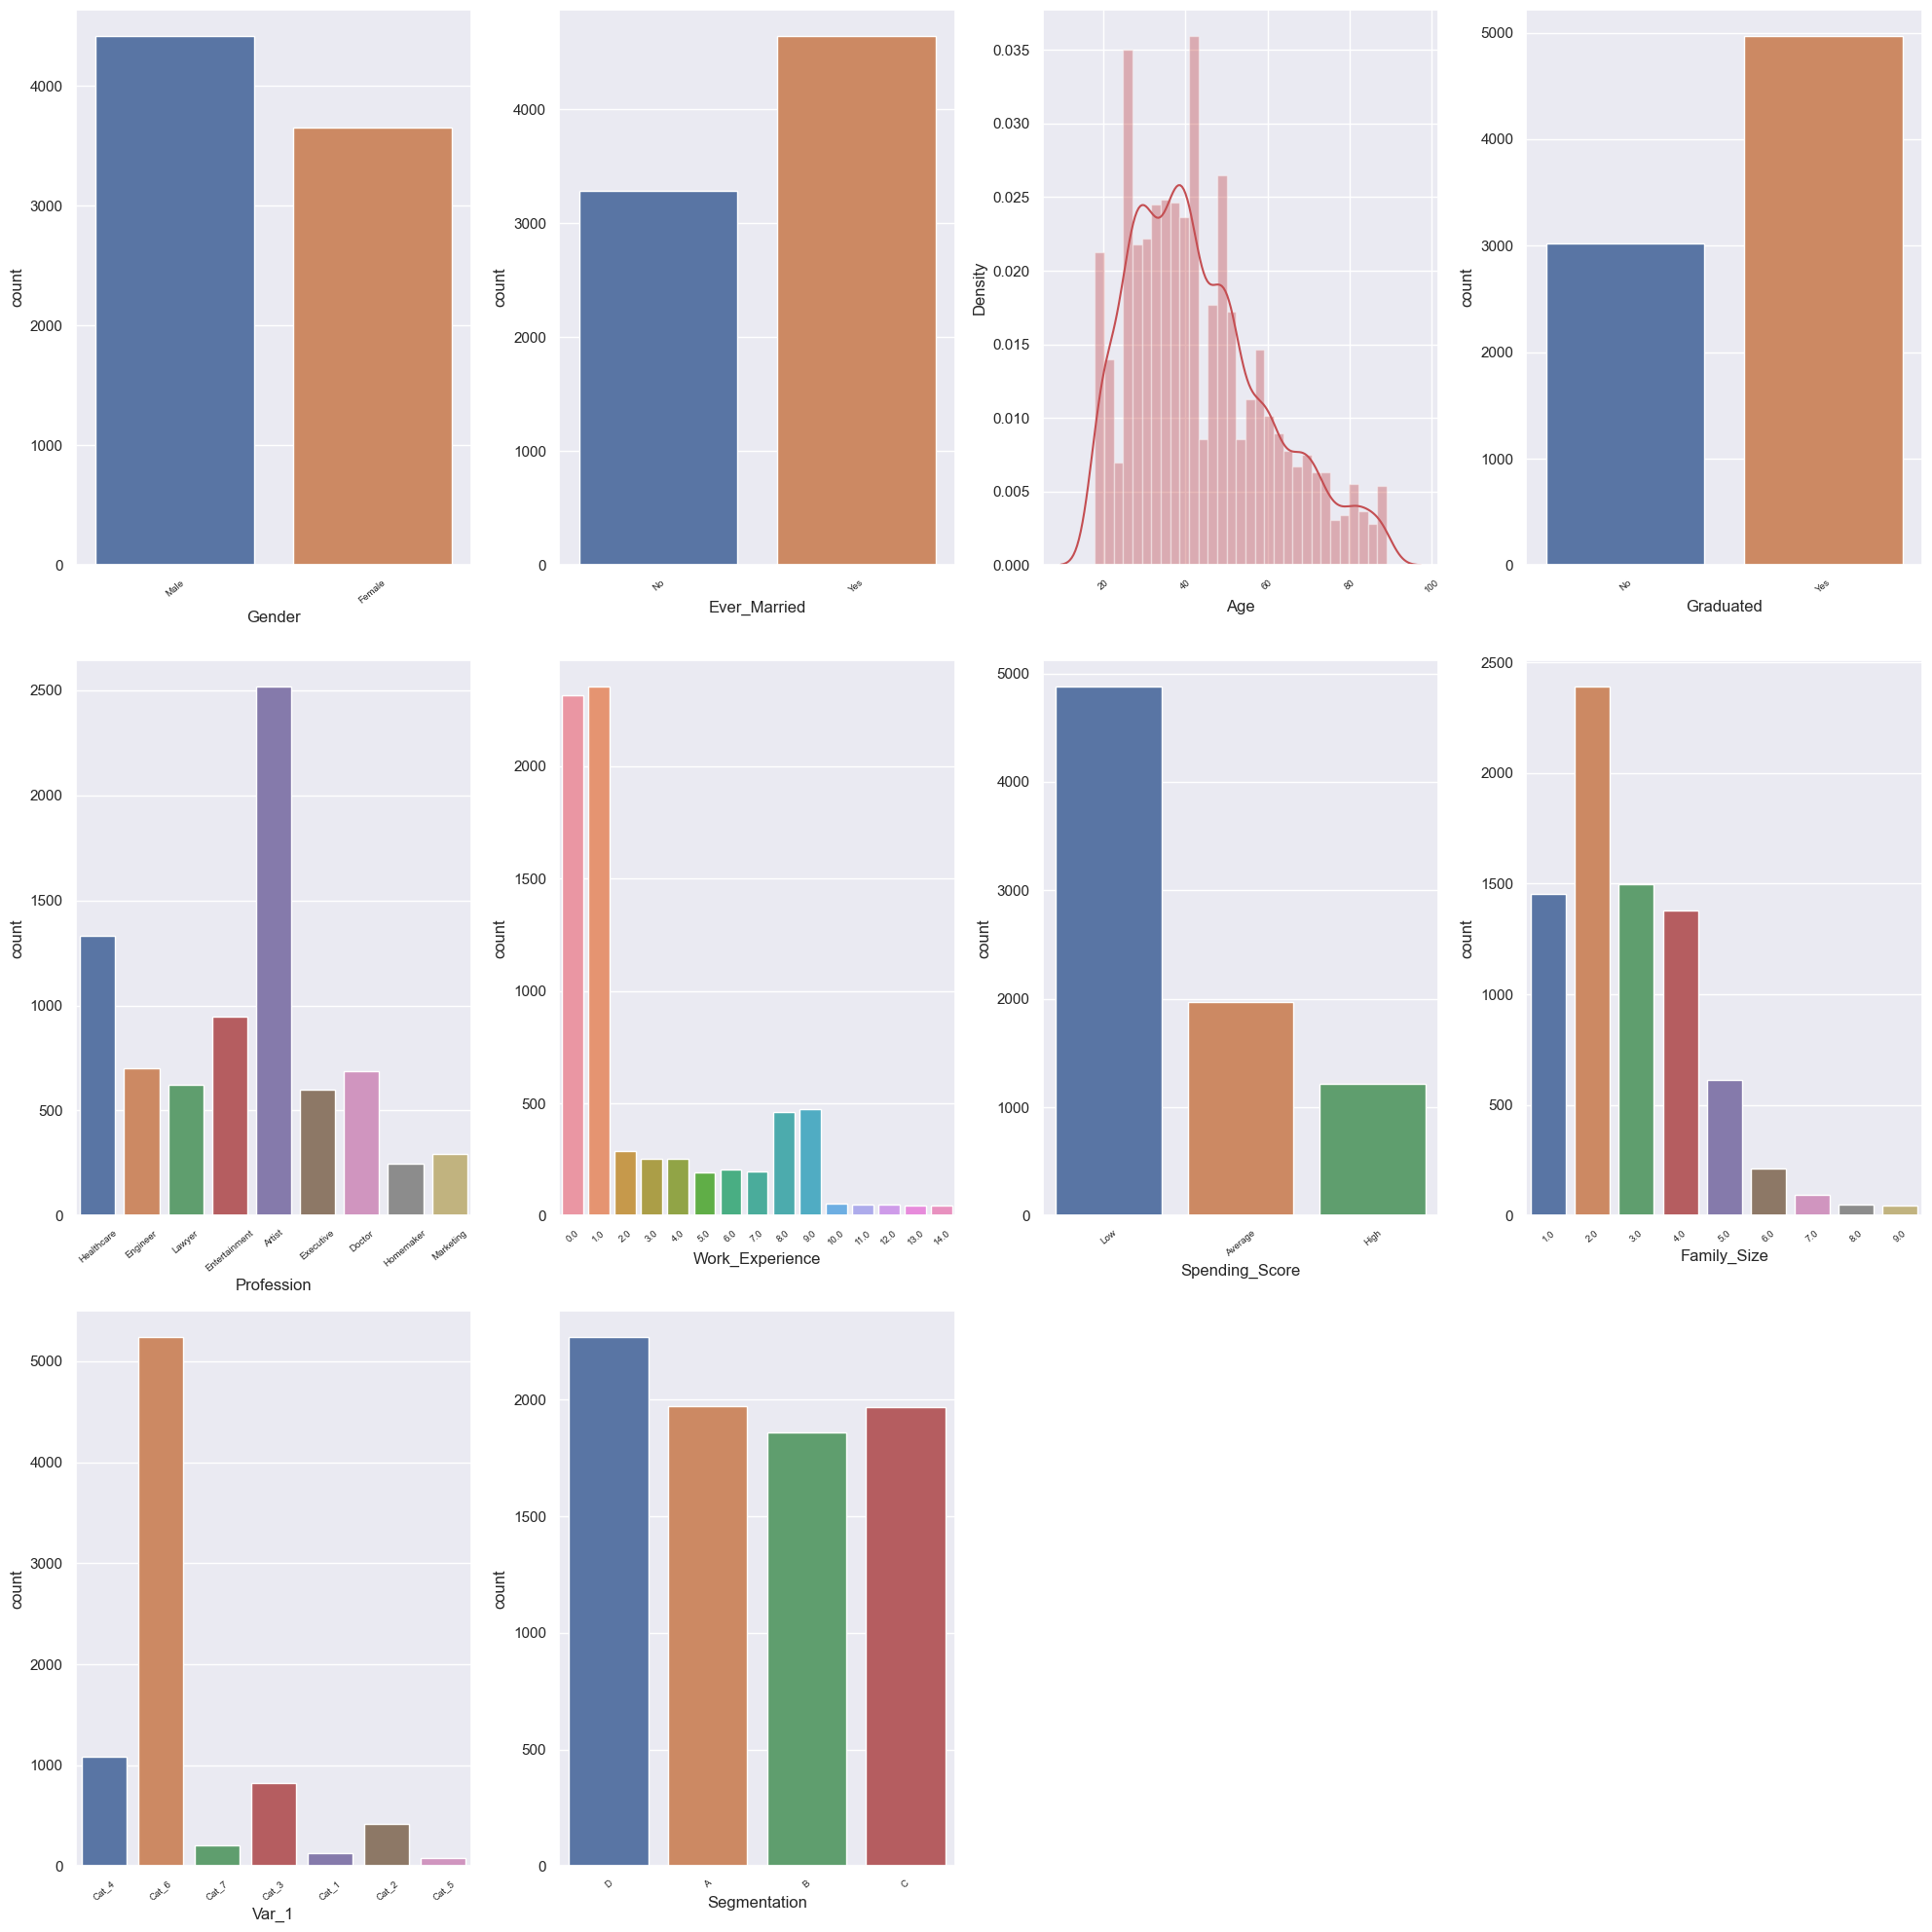

In [82]:
train_sp = train['Age']
#plt.subplots(constrained_layout=True)
for i in range(10):
    if i != 2:
        plt.subplot(3,4,i+1)
        sns.set(rc = {'figure.figsize':(20,20)})
        sns.countplot(x=train.columns[i], data = train)
        plt.xticks(fontsize = 7, rotation=40)
        #plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=1, hspace=2)

    else:
        plt.subplot(3,4,i+1)
        sns.set(rc = {'figure.figsize':(20,20)})
        sns.distplot(train_sp, color = 'r')
        #sns.kdeplot(train_sp, fill = True)
        plt.xticks(fontsize = 7, rotation=40)
        #plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=1, hspace=2)

        
plt.tight_layout()

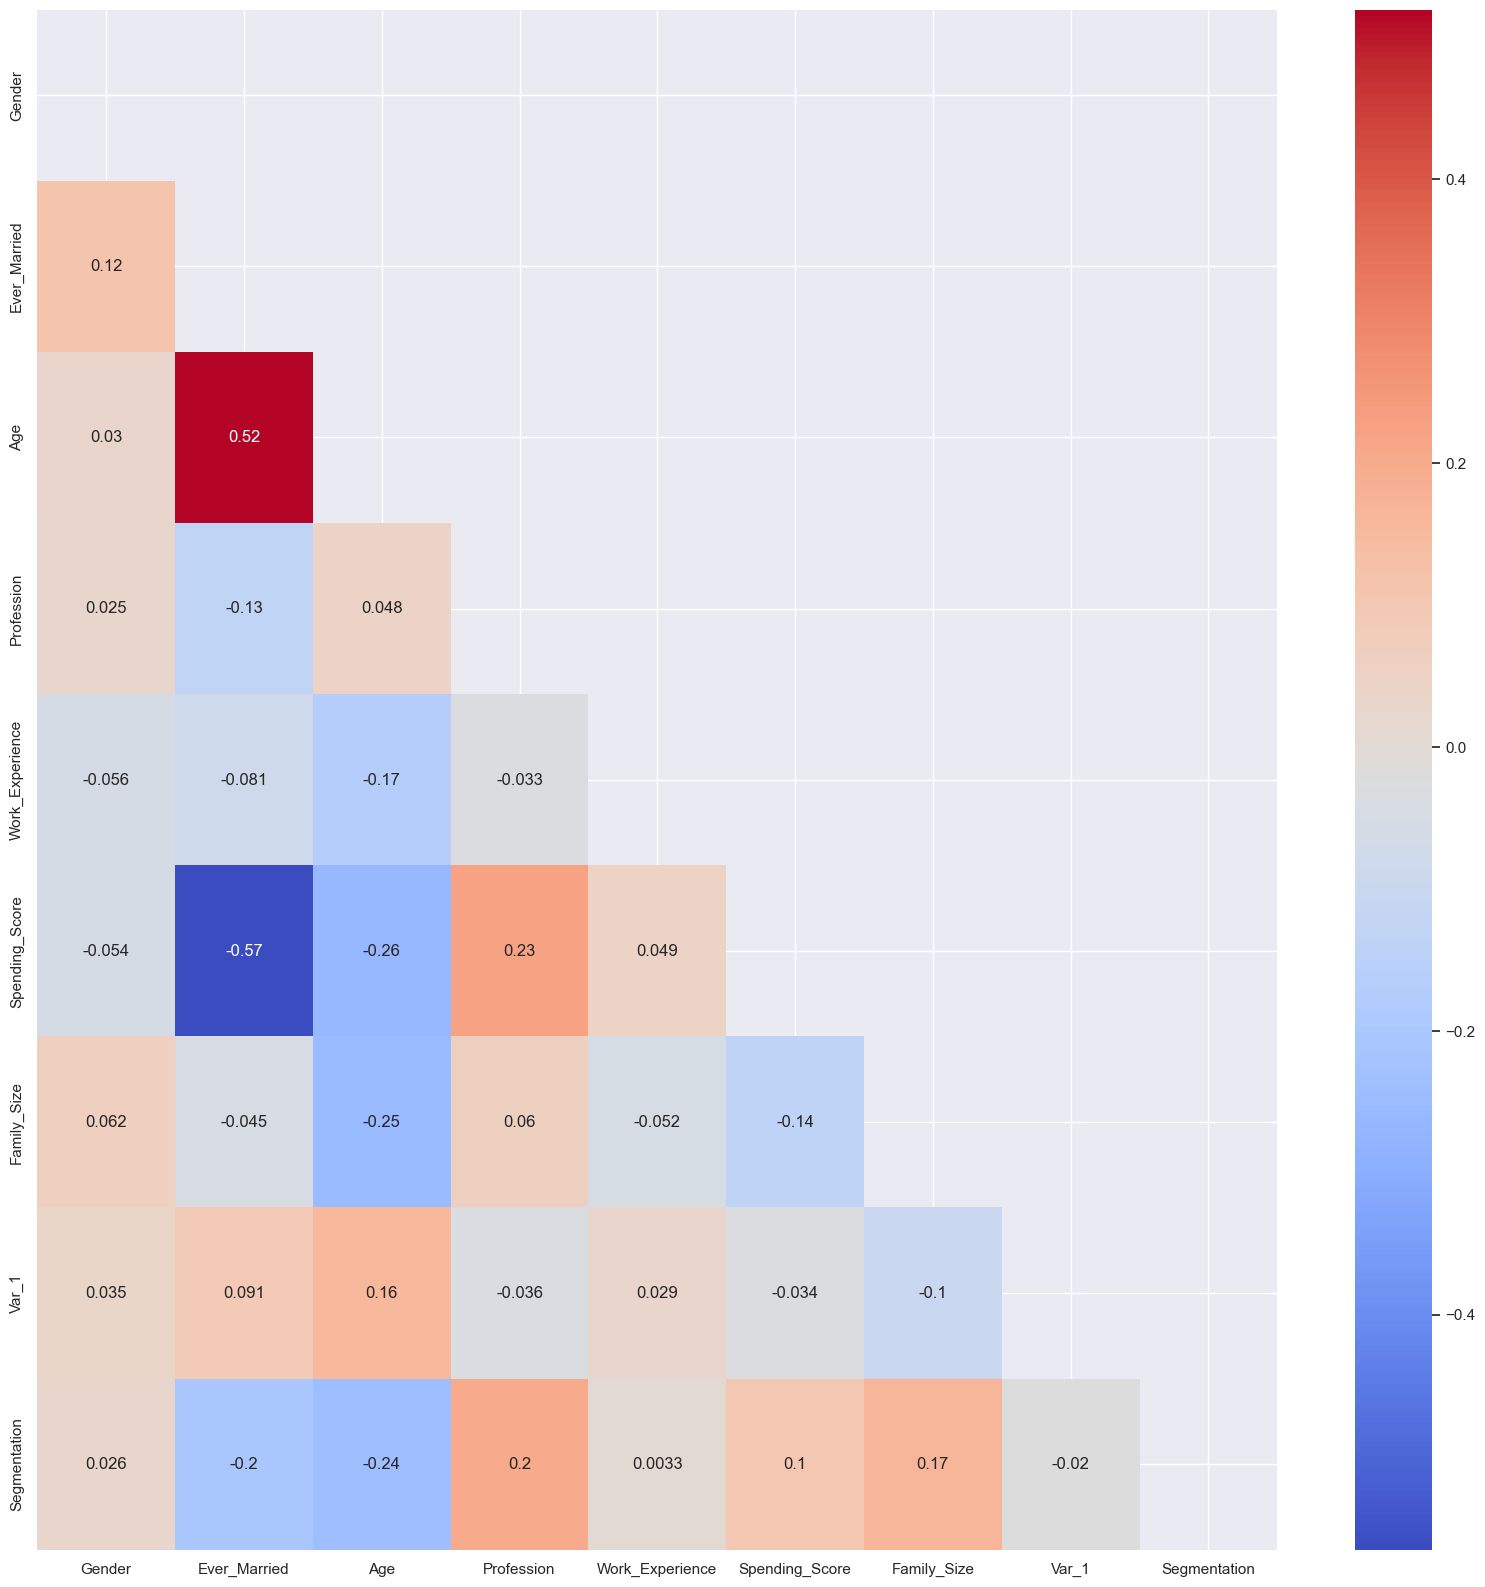

In [85]:
for i in range(10):
    if i == 3:
        continue
    else:
        train[train.columns[i]] = train[train.columns[i]].astype('category').cat.codes
        
corr_matrix = train.corr()
mask = np.triu(corr_matrix)
# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask = mask)

# Show plot
plt.show()